# Skin Diseases Classification

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import cv2
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
train_data_dir = 'model_input/train'
test_data_dir = 'model_input/test'

In [6]:
class_labels = os.listdir(train_data_dir)
print(class_labels)

['benign', 'melanoma']


In [7]:
for wdir in os.listdir('model_input'):
    print(wdir)
    wdir_total = 0
    for label in class_labels:
        total = len(os.listdir(os.path.join('model_input', wdir, label)))
        print(label, total)
        wdir_total +=total
    print(wdir,'-----',wdir_total)

test
benign 45
melanoma 72
test ----- 117
train
benign 260
melanoma 474
train ----- 734


In [8]:
nb_train_samples =734
nb_test_samples = 117
num_classes = 2
img_rows= 128
img_cols= 128
channel = 3

In [14]:
def load_training_data():
    #Load training images
    labels = os.listdir(train_data_dir)
    print(labels)
    total = len(labels)
    
    X_train = np.ndarray((nb_train_samples, img_rows, img_cols, 3), dtype = np.uint8)
    Y_train = np.zeros((nb_train_samples,), dtype = np.uint8)
    
    i = 0
    print('-'*30)
    print('Creating training images...')
    print('-'*30)
    
    j = 0
    for label in labels:
        image_names_train = os.listdir(os.path.join(train_data_dir, label))
        total = len(image_names_train)
        print(label, total)
        for image_name in image_names_train:
            try:
                
                img = cv2.imread(os.path.join(train_data_dir, label, image_name), 1)
                img = np.array(cv2.resize(img, (img_rows,img_cols)))
                X_train[i] = img
                Y_train[i] = j
            except Exception as e:
                pass

            if i % 100 == 0:
                print('Done: {0}/{1} images'.format(i, total))
            i += 1
        j += 1    
    print(str(i) +"-------"+ str(j))                
    print('Loading done.')
    
    print('Transform targets to keras compatible format.')
    Y_train = to_categorical(Y_train[:nb_train_samples], num_classes)

    return X_train, Y_train

In [15]:
def load_validation_data():
    # Load validation images
    labels = os.listdir(test_data_dir)
    

    X_test = np.ndarray((nb_test_samples, img_rows, img_cols, 3), dtype=np.uint8)
    Y_test = np.zeros((nb_test_samples,), dtype='uint8')

    i = 0
    print('-'*30)
    print('Creating validation images...')
    print('-'*30)
    j = 0
    for label in labels:
        image_names_test = os.listdir(os.path.join(test_data_dir, label))
        total = len(image_names_test)
        print(label, total)
        for image_name in image_names_test:
            try:
                img = cv2.imread(os.path.join(test_data_dir, label, image_name), 1)

                img = np.array(cv2.resize(img, (img_rows,img_cols)))

                X_test[i] = img
                Y_test[i] = j
            except Exception as e:
                
                pass

            if i % 200 == 0:
                print('Done: {0}/{1} images'.format(i, total))
            i += 1
        j += 1
    print(i)            
    print('Loading done.')
    
    print('Transform targets to keras compatible format.');
    Y_test = to_categorical(Y_test[:nb_test_samples], num_classes)

    
    return X_test, Y_test

In [16]:
x_train, y_train = load_training_data()
x_test, y_test = load_validation_data()

['benign', 'melanoma']
------------------------------
Creating training images...
------------------------------
benign 260
Done: 0/260 images
Done: 100/260 images
Done: 200/260 images
melanoma 474
Done: 300/474 images
Done: 400/474 images
Done: 500/474 images
Done: 600/474 images
Done: 700/474 images
734-------2
Loading done.
Transform targets to keras compatible format.
------------------------------
Creating validation images...
------------------------------
benign 45
Done: 0/45 images
melanoma 72
117
Loading done.
Transform targets to keras compatible format.


In [17]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(734, 128, 128, 3) (734, 2) (117, 128, 128, 3) (117, 2)


In [18]:
# normalize data
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')

x_train = x_train/255.0
x_test = x_test/255.0

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(64, (3, 3),activation='relu', padding='same', input_shape=(128,128,3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))

In [24]:
from tensorflow.keras.optimizers import Adam

# Create the Adam optimizer with the new parameters
optimizer = Adam(learning_rate=0.001, weight_decay=1e-4)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 29, 29, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      51,381,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           2,050 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,754,114 (197.43 MB)

 Trainable params: 51,754,114 (197.43 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history=model.fit(x_train,y_train,batch_size=64,epochs=25,validation_data=(x_test, y_test))

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4994 - loss: 1.1443 - val_accuracy: 0.6154 - val_loss: 0.6919
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6314 - loss: 0.6707 - val_accuracy: 0.6154 - val_loss: 0.6207
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6348 - loss: 0.6247 - val_accuracy: 0.6496 - val_loss: 0.5962
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6952 - loss: 0.5713 - val_accuracy: 0.6581 - val_loss: 0.6022
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7458 - loss: 0.5244 - val_accuracy: 0.6752 - val_loss: 0.6188
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7540 - loss: 0.4670 - val_accuracy: 0.6923 - val_loss: 0.5892
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8011 - loss: 0.4152 - val_accuracy: 0.7350 - val_loss: 0.5460
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.8388 - loss: 0.3612 - val_accuracy: 0.8034 - val_loss:

In [27]:
y_pred = model.predict(x_test, batch_size=32, verbose=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step


In [28]:
y_predict = []
for i in range(0, len(y_pred)):
    y_predict.append(int(np.argmax(y_pred[i])))
len(y_predict)

117

In [29]:
y_true = []
for i in range(0, len(y_test)):
    y_true.append(int(np.argmax(y_test[i])))
len(y_true)

117

In [30]:
model_accuracy=accuracy_score(y_true,y_predict)
print("model accuracy is {:.2f}%".format(model_accuracy))

model accuracy is 1.00%


In [31]:
print(classification_report(y_true=y_true,y_pred=y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        72

    accuracy                           1.00       117
   macro avg       1.00      1.00      1.00       117
weighted avg       1.00      1.00      1.00       117



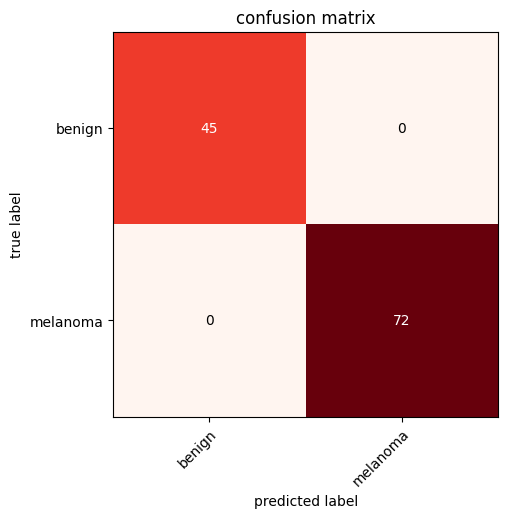

In [33]:
from mlxtend.plotting import plot_confusion_matrix
ax=plot_confusion_matrix(conf_mat=confusion_matrix(y_true,y_predict),
                        figsize=(10,5),
                        class_names=class_labels,
                        cmap=plt.cm.Reds)
plt.title(label="confusion matrix")
plt.show()

In [34]:
score = model.evaluate(x= x_test, y= y_test, batch_size=32)
acc = score[1]
err = 1 - acc
print("Loss Value : ", score[0])
print("Accuracy : ", score[1])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 9.6198e-04
Loss Value :  0.0009303550468757749
Accuracy :  1.0


In [36]:
model_structure = model.to_json()
f = Path("model/model_structure.json")
f.write_text(model_structure)

7455

In [38]:
model.save_weights("model/model.weights.h5")

# Thank You !